In [1]:
# Install TensorFlow if missing (Jupyter magic)
%pip install tensorflow --quiet

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


Note: you may need to restart the kernel to use updated packages.


In [3]:
stock_history = pd.read_csv("C:/Users/Hp/Downloads/TCS_stock_history.csv")
stock_action = pd.read_csv("C:/Users/Hp/Downloads/TCS_stock_action.csv")
stock_info = pd.read_csv("C:/Users/Hp/Downloads/TCS_stock_info.csv")


In [6]:
print(stock_action.info())
stock_action.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          70 non-null     object 
 1   Dividends     70 non-null     float64
 2   Stock Splits  70 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.8+ KB
None


,Date,Dividends,Stock Splits
0,2004-10-28,0.3750,0.0
1,2005-02-03,0.4375,0.0
2,2005-07-06,0.6250,0.0
3,2005-08-18,0.3750,0.0
4,2005-10-18,0.3750,0.0
5,2006-01-18,0.3750,0.0
6,2006-06-16,0.5625,0.0
7,2006-07-28,0.3750,2.0
8,2006-10-23,0.7500,0.0
9,2007-01-22,0.7500,0.0


In [7]:
print(stock_history.info())
stock_history.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4463 entries, 0 to 4462
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          4463 non-null   object 
 1   Open          4463 non-null   float64
 2   High          4463 non-null   float64
 3   Low           4463 non-null   float64
 4   Close         4463 non-null   float64
 5   Volume        4463 non-null   int64  
 6   Dividends     4463 non-null   float64
 7   Stock Splits  4463 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 279.1+ KB
None


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-08-12,28.794172,29.742206,28.794172,29.519140,212976,0.0,0.0
1,2002-08-13,29.556316,30.030333,28.905705,29.119476,153576,0.0,0.0
2,2002-08-14,29.184536,29.184536,26.563503,27.111877,822776,0.0,0.0
3,2002-08-15,27.111877,27.111877,27.111877,27.111877,0,0.0,0.0
4,2002-08-16,26.972458,28.255089,26.582090,27.046812,811856,0.0,0.0
5,2002-08-19,27.269876,27.269876,26.126661,26.377609,205880,0.0,0.0
6,2002-08-20,26.563503,28.794168,26.386910,27.111877,3773624,0.0,0.0
7,2002-08-21,28.608262,29.147341,27.158333,28.440964,3011064,0.0,0.0
8,2002-08-22,29.379720,30.913303,29.231009,29.667849,6732480,0.0,0.0
9,2002-08-23,29.928077,32.437575,29.565595,31.452364,4841672,0.0,0.0


In [8]:
print(stock_info.info())
stock_info.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   zip     150 non-null    object
 1   400001  108 non-null    object
dtypes: object(2)
memory usage: 2.5+ KB
None


,zip,400001
0,sector,Technology
1,fullTimeEmployees,509058
2,longBusinessSummary,Tata Consultancy Services Limited provides inf...
3,city,Mumbai
4,phone,91 22 6778 9999
5,country,India
6,companyOfficers,[]
7,website,http://www.tcs.com
8,maxAge,1
9,address1,TCS House


In [9]:
data = stock_history
data.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,4463.000000,4463.000000,4463.000000,4463.000000,4.463000e+03,4463.000000,4463.000000
mean,866.936239,876.675013,856.653850,866.537398,3.537876e+06,0.071533,0.001344
std,829.905368,838.267104,821.233477,829.611313,3.273531e+06,0.965401,0.051842
min,24.146938,27.102587,24.146938,26.377609,0.000000e+00,0.000000,0.000000
25%,188.951782,191.571816,185.979417,188.594620,1.860959e+06,0.000000,0.000000
50%,530.907530,534.751639,525.616849,529.713257,2.757742e+06,0.000000,0.000000
75%,1156.462421,1165.815854,1143.622800,1154.784851,4.278625e+06,0.000000,0.000000
max,3930.000000,3981.750000,3892.100098,3954.550049,8.806715e+07,40.000000,2.000000


In [10]:
# Missing Values
data.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

Exploratory Data Analysis

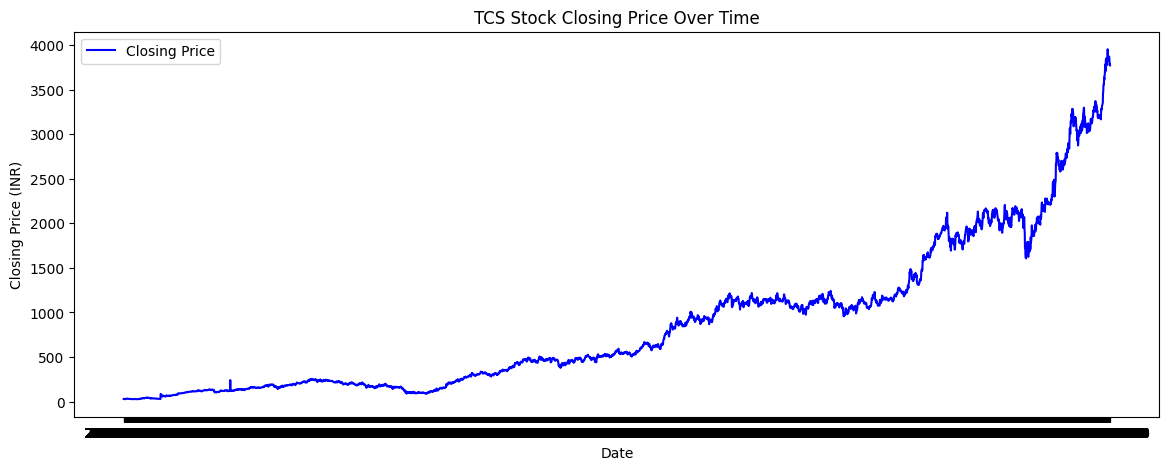

In [11]:
# Closing Price Trend
plt.figure(figsize=(14, 5))
plt.plot(data["Date"], data["Close"], label="Closing Price", color='blue')
plt.title("TCS Stock Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Closing Price (INR)")
plt.legend()
plt.show()

Long-term upward trend

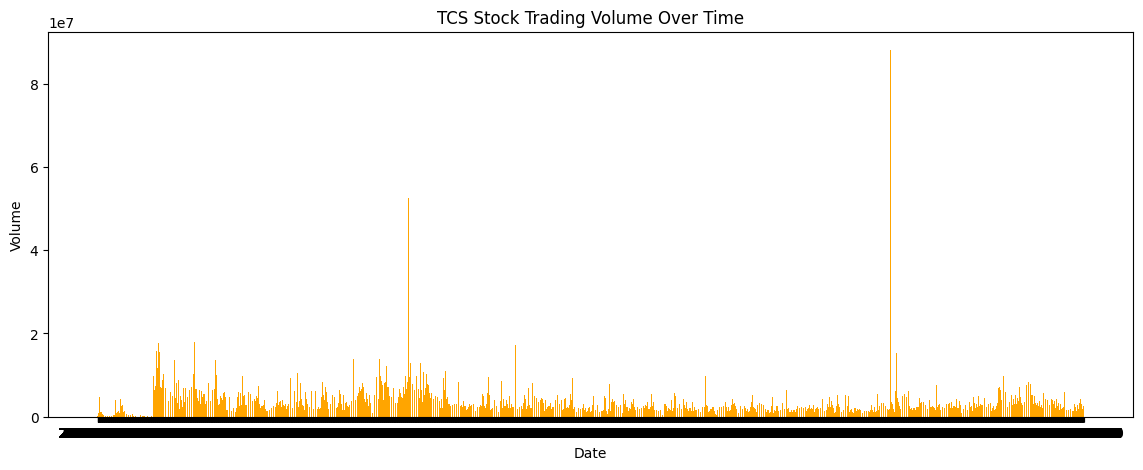

In [12]:
# Volume Analysis
plt.figure(figsize=(14, 5))
plt.bar(data["Date"], data["Volume"], color='orange')
plt.title("TCS Stock Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.show()

Volume spikes during high volatility

No direct linear relation with price

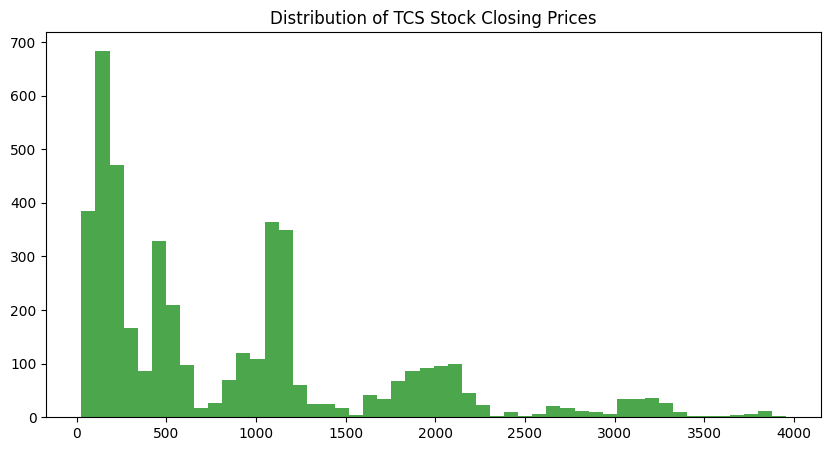

In [13]:
# Distribution of Closing Prices
plt.figure(figsize=(10, 5))
plt.hist(data["Close"], bins=50, color='green', alpha=0.7)
plt.title("Distribution of TCS Stock Closing Prices")
plt.show()

Right-skewed distribution

Prices increase over time

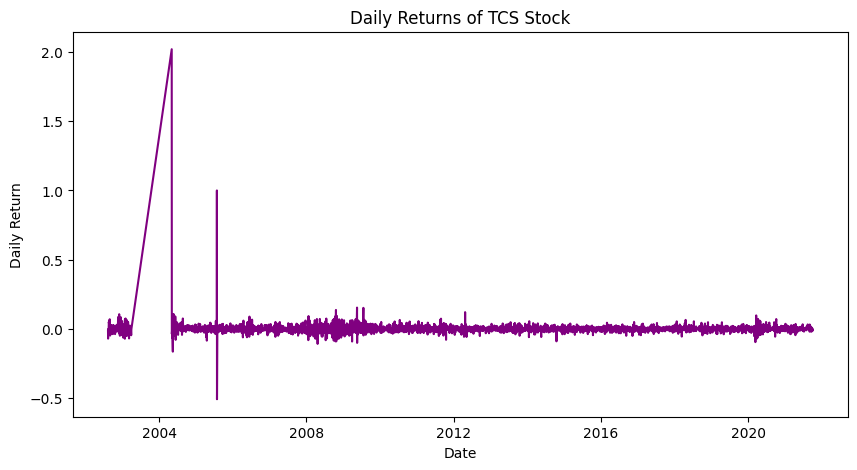

In [18]:
# Daily Returns
df = pd.read_csv("C:/Users/Hp/Downloads/TCS_stock_history.csv")

df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values("Date").reset_index(drop=True)

df['Daily Return'] = df['Close'].pct_change()
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Daily Return'], color='purple')
plt.title("Daily Returns of TCS Stock")
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.show()

Most returns are near zero

Few extreme movements (risk)

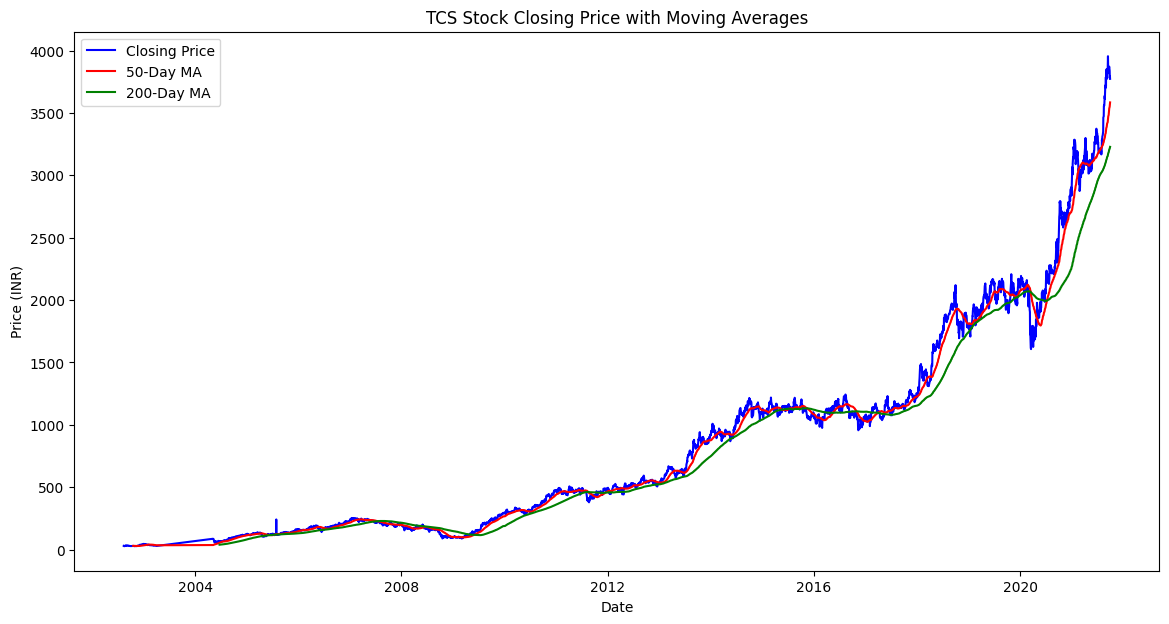

In [17]:
# Moving Averages
df['MA50'] = df['Close'].rolling(window=50).mean()
df['MA200'] = df['Close'].rolling(window=200).mean()

plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Closing Price', color='blue')
plt.plot(df['Date'], df['MA50'], label='50-Day MA', color='red')
plt.plot(df['Date'], df['MA200'], label='200-Day MA', color='green')
plt.title("TCS Stock Closing Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.legend()
plt.show()

Smooths price fluctuations

Confirms long-term trend

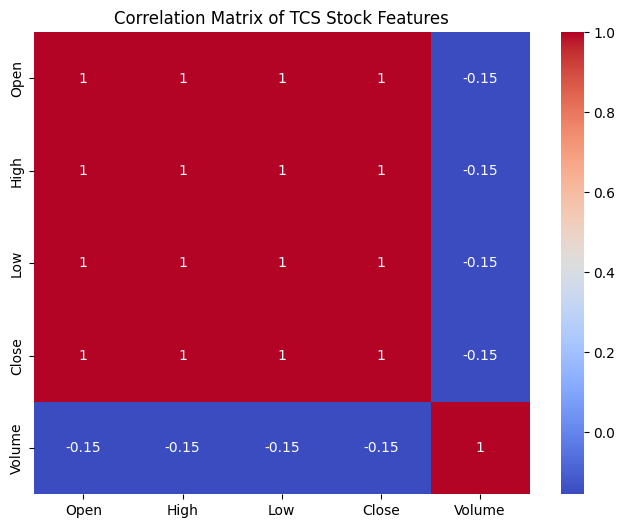

In [19]:
# Correlation Matrix
correlation_matrix = df[['Open', 'High', 'Low', 'Close', 'Volume']].corr()
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of TCS Stock Features")
plt.show()

Open, High, Low, Close → highly correlated

Volume → weak correlation with price

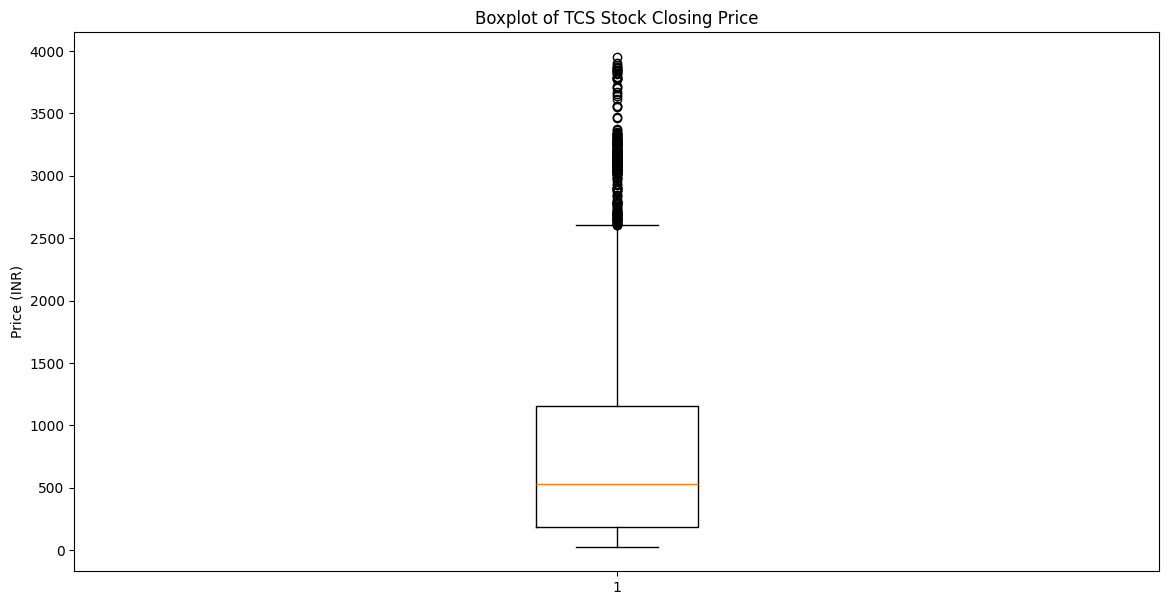

In [20]:
# Boxplot (Outlier Detection)
plt.figure(figsize=(14, 7))
plt.boxplot(df['Close'])
plt.title("Boxplot of TCS Stock Closing Price")
plt.ylabel("Price (INR)")
plt.show()

Long upper whisker

Reflects long-term growth

EDA was performed to understand price trends, volatility, correlations, and data quality. The closing price showed a strong upward trend, high correlation among price variables, and weak correlation with volume.

FEATURE ENGINEERING

In [21]:
df = pd.read_csv("C:/Users/Hp/Downloads/TCS_stock_history.csv")
df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values("Date").reset_index(drop=True)

In [22]:
# Create Daily Returns
df['Daily Return'] = df['Close'].pct_change()
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Daily Return
0,2002-08-12,28.794172,29.742206,28.794172,29.519140,212976,0.0,0.0,NaN
1,2002-08-13,29.556316,30.030333,28.905705,29.119476,153576,0.0,0.0,-0.013539
2,2002-08-14,29.184536,29.184536,26.563503,27.111877,822776,0.0,0.0,-0.068944
3,2002-08-15,27.111877,27.111877,27.111877,27.111877,0,0.0,0.0,0.000000
4,2002-08-16,26.972458,28.255089,26.582090,27.046812,811856,0.0,0.0,-0.002400


In [23]:
# Create Lag Features
df['Lag1'] = df['Close'].shift(1)
df['Lag2'] = df['Close'].shift(2)
df['lag3'] = df['Close'].shift(3)
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Daily Return,Lag1,Lag2,lag3
0,2002-08-12,28.794172,29.742206,28.794172,29.519140,212976,0.0,0.0,NaN,NaN,NaN,NaN
1,2002-08-13,29.556316,30.030333,28.905705,29.119476,153576,0.0,0.0,-0.013539,29.519140,NaN,NaN
2,2002-08-14,29.184536,29.184536,26.563503,27.111877,822776,0.0,0.0,-0.068944,29.119476,29.519140,NaN
3,2002-08-15,27.111877,27.111877,27.111877,27.111877,0,0.0,0.0,0.000000,27.111877,29.119476,29.519140
4,2002-08-16,26.972458,28.255089,26.582090,27.046812,811856,0.0,0.0,-0.002400,27.111877,27.111877,29.119476


In [31]:
# Moving Averages
df['MA5'] = df['Close'].rolling(window=5).mean()
df['MA10'] = df['Close'].rolling(window=10).mean()
df['MA20'] = df['Close'].rolling(window=20).mean()
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Daily Return,Lag1,...,MA50,MA200,MA5,MA10,MA15,Price Range,Open-Close Diff,Day,Month,MA20
0,2004-06-21,66.919920,68.407029,64.540547,65.451401,49328,0.0,0.0,-0.010678,66.157806,...,53.539858,38.361673,NaN,NaN,62.308044,3.866482,1.468519,21,6,NaN
1,2004-06-22,65.432855,65.618744,63.573967,63.927155,20064,0.0,0.0,-0.023288,65.451401,...,54.208315,38.533714,NaN,NaN,62.598649,2.044777,1.505700,22,6,NaN
2,2004-06-23,64.596334,65.061056,61.584935,62.681683,22912,0.0,0.0,-0.019483,63.927155,...,54.837176,38.701525,NaN,NaN,62.811801,3.476122,1.914652,23,6,NaN
3,2004-06-24,63.192893,64.317518,61.919554,63.722672,21592,0.0,0.0,0.016608,62.681683,...,55.496152,38.884579,NaN,NaN,63.160033,2.397964,-0.529778,24,6,NaN
4,2004-06-25,63.202185,65.061073,63.202185,63.722672,60280,0.0,0.0,0.000000,63.722672,...,56.147134,39.067632,63.901116,NaN,63.518798,1.858888,-0.520486,25,6,NaN


In [26]:
# Price Range Feature
df['Price Range'] = df['High'] - df['Low']
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Daily Return,Lag1,Lag2,lag3,MA50,MA200,MA5,MA10,MA15,Price Range
0,2002-08-12,28.794172,29.742206,28.794172,29.519140,212976,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.948034
1,2002-08-13,29.556316,30.030333,28.905705,29.119476,153576,0.0,0.0,-0.013539,29.519140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.124628
2,2002-08-14,29.184536,29.184536,26.563503,27.111877,822776,0.0,0.0,-0.068944,29.119476,29.519140,NaN,NaN,NaN,NaN,NaN,NaN,2.621033
3,2002-08-15,27.111877,27.111877,27.111877,27.111877,0,0.0,0.0,0.000000,27.111877,29.119476,29.519140,NaN,NaN,NaN,NaN,NaN,0.000000
4,2002-08-16,26.972458,28.255089,26.582090,27.046812,811856,0.0,0.0,-0.002400,27.111877,27.111877,29.119476,NaN,NaN,27.981837,NaN,NaN,1.672999


In [27]:
# Open Close Difference Feature
df['Open-Close Diff'] = df['Open'] - df['Close']
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Daily Return,Lag1,Lag2,lag3,MA50,MA200,MA5,MA10,MA15,Price Range,Open-Close Diff
0,2002-08-12,28.794172,29.742206,28.794172,29.519140,212976,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.948034,-7.249680e-01
1,2002-08-13,29.556316,30.030333,28.905705,29.119476,153576,0.0,0.0,-0.013539,29.519140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.124628,4.368398e-01
2,2002-08-14,29.184536,29.184536,26.563503,27.111877,822776,0.0,0.0,-0.068944,29.119476,29.519140,NaN,NaN,NaN,NaN,NaN,NaN,2.621033,2.072659e+00
3,2002-08-15,27.111877,27.111877,27.111877,27.111877,0,0.0,0.0,0.000000,27.111877,29.119476,29.519140,NaN,NaN,NaN,NaN,NaN,0.000000,-3.552714e-15
4,2002-08-16,26.972458,28.255089,26.582090,27.046812,811856,0.0,0.0,-0.002400,27.111877,27.111877,29.119476,NaN,NaN,27.981837,NaN,NaN,1.672999,-7.435436e-02


In [28]:
# Date Based Features
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Daily Return,Lag1,...,lag3,MA50,MA200,MA5,MA10,MA15,Price Range,Open-Close Diff,Day,Month
0,2002-08-12,28.794172,29.742206,28.794172,29.519140,212976,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.948034,-7.249680e-01,12,8
1,2002-08-13,29.556316,30.030333,28.905705,29.119476,153576,0.0,0.0,-0.013539,29.519140,...,NaN,NaN,NaN,NaN,NaN,NaN,1.124628,4.368398e-01,13,8
2,2002-08-14,29.184536,29.184536,26.563503,27.111877,822776,0.0,0.0,-0.068944,29.119476,...,NaN,NaN,NaN,NaN,NaN,NaN,2.621033,2.072659e+00,14,8
3,2002-08-15,27.111877,27.111877,27.111877,27.111877,0,0.0,0.0,0.000000,27.111877,...,29.519140,NaN,NaN,NaN,NaN,NaN,0.000000,-3.552714e-15,15,8
4,2002-08-16,26.972458,28.255089,26.582090,27.046812,811856,0.0,0.0,-0.002400,27.111877,...,29.119476,NaN,NaN,27.981837,NaN,NaN,1.672999,-7.435436e-02,16,8


In [29]:
df = df.dropna().reset_index(drop=True)
df.shape


(4264, 21)

In [30]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits', 'Daily Return', 'Lag1', 'Lag2', 'lag3', 'MA50', 'MA200',
       'MA5', 'MA10', 'MA15', 'Price Range', 'Open-Close Diff', 'Day',
       'Month'],
      dtype='object')

Feature engineering was performed by creating lag variables, moving averages, volatility measures, and daily returns to capture temporal dependency and trend behavior in stock prices.

Data Preparation for LSTM (Scaling + Sequence Creation)

In [32]:
# Ensure Feature-Engineered Data Is Ready for Modeling
df = df.dropna().reset_index(drop=True)
df.shape

(4245, 22)

In [34]:
# Select features for LSTM model
features = ['Lag1', 'Lag2', 'lag3', 'MA5', 'MA10', 'MA20', 'Price Range', 'Open-Close Diff', 'Day', 'Month']
data = df[features]
data.head()

,Lag1,Lag2,lag3,MA5,MA10,MA20,Price Range,Open-Close Diff,Day,Month
0,67.589142,67.375381,65.683800,67.087250,65.944961,65.533683,2.212075,-0.185889,16,7
1,69.875572,67.589142,67.375381,68.293665,66.468236,65.808334,2.565262,-0.120827,19,7
2,70.944427,69.875572,67.589142,69.609756,67.061224,66.225190,2.583853,-0.882972,20,7
3,72.264259,70.944427,69.875572,70.459267,67.671869,66.672252,3.169401,2.555970,21,7
4,71.622932,72.264259,70.944427,71.191673,68.518593,67.048677,1.477818,1.245457,22,7


In [35]:
# Scale Features
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)
data_scaled = pd.DataFrame(data_scaled, columns=features)
data_scaled.head()

,Lag1,Lag2,lag3,MA5,MA10,MA20,Price Range,Open-Close Diff,Day,Month
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007229,0.545591,0.500000,0.545455
1,0.000588,0.000055,0.000435,0.000316,0.000138,0.000073,0.008383,0.545808,0.600000,0.545455
2,0.000863,0.000643,0.000490,0.000661,0.000293,0.000183,0.008444,0.543275,0.633333,0.545455
3,0.001203,0.000918,0.001078,0.000884,0.000454,0.000302,0.010358,0.554701,0.666667,0.545455
4,0.001038,0.001258,0.001353,0.001075,0.000676,0.000401,0.004830,0.550347,0.700000,0.545455


MinMax scaling was applied to normalize features between 0 and 1 for stable LSTM training

In [36]:
# Create Sequences for LSTM
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data.iloc[i:i+seq_length].values)
        y.append(data.iloc[i+seq_length]['Lag1'])  # Predicting next day's closing price
    return np.array(X), np.array(y)

seq_length = 10
X, y = create_sequences(data_scaled, seq_length)
X.shape, y.shape

((4235, 10, 10), (4235,))

In [37]:
# Train Test Split
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3388, 10, 10), (847, 10, 10), (3388,), (847,))

Data was split chronologically to prevent data leakage.

In [39]:
print("X_train.shape:", X_train.shape)
print("X_test.shape:", X_test.shape)
print("y_train.shape:", y_train.shape)
print("y_test.shape:", y_test.shape)

X_train.shape: (3388, 10, 10)
X_test.shape: (847, 10, 10)
y_train.shape: (3388,)
y_test.shape: (847,)


LSTM Model Building & Training

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


In [41]:
# Build LSTM Model
model = Sequential()

# LSTM layer
model.add(LSTM(
    units=50,
    activation="tanh",
    input_shape=(X_train.shape[1], X_train.shape[2])
))

# Optional dropout (prevents overfitting)
model.add(Dropout(0.2))

# Output layer
model.add(Dense(1))

# Compile model
model.compile(
    optimizer="adam",
    loss="mean_squared_error"
)

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                12200     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 12251 (47.86 KB)
Trainable params: 12251 (47.86 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [42]:
# EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

In [43]:
# Train the model
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/100
85/85 [==============================] - 5s 10ms/step - loss: 0.0032 - val_loss: 3.6023e-04
Epoch 2/100
85/85 [==============================] - 0s 5ms/step - loss: 7.8690e-04 - val_loss: 1.2082e-04
Epoch 3/100
85/85 [==============================] - 0s 5ms/step - loss: 4.8929e-04 - val_loss: 1.2905e-04
Epoch 4/100
85/85 [==============================] - 0s 5ms/step - loss: 3.4189e-04 - val_loss: 1.2136e-04
Epoch 5/100
85/85 [==============================] - 0s 5ms/step - loss: 2.5230e-04 - val_loss: 1.1216e-04
Epoch 6/100
85/85 [==============================] - 0s 5ms/step - loss: 2.3143e-04 - val_loss: 8.8112e-05
Epoch 7/100
85/85 [==============================] - 0s 4ms/step - loss: 2.0496e-04 - val_loss: 7.8409e-05
Epoch 8/100
85/85 [==============================] - 0s 5ms/step - loss: 1.7783e-04 - val_loss: 1.1562e-04
Epoch 9/100
85/85 [==============================] - 0s 5ms/step - loss: 1.5509e-04 - val_loss: 6.9094e-05
Epoch 10/100
85/85 [====================

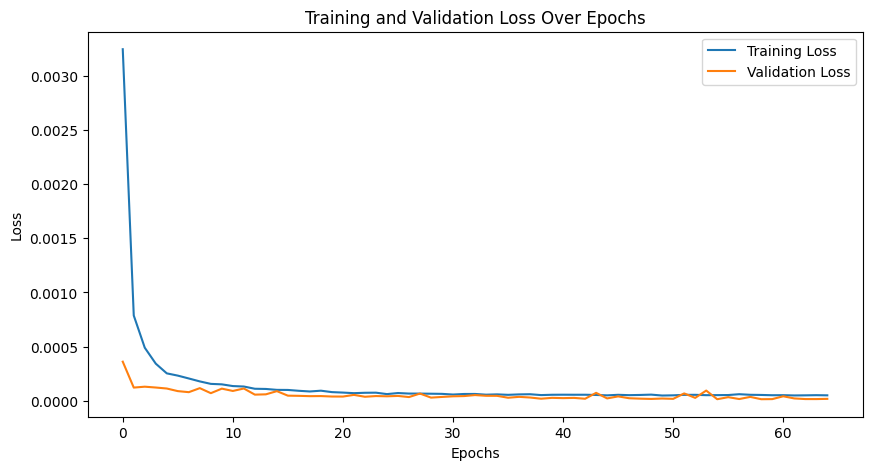

In [44]:
# Plot Training and Validation Loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Training and Validation Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Both curves decreasing → good learning

No large gap → no overfitting

In [45]:
# Make Predictions
y_pred = model.predict(X_test)
y_pred = y_pred.flatten()
y_pred[:5]
y_test[:5]

27/27 [==============================] - 0s 5ms/step


array([0.39037174, 0.38762035, 0.39774066, 0.40599477, 0.39555148])

In [51]:
# Number of features used during scaling
num_features = len(features)
# Inverse Transform Predictions and Actual Values
y_pred_inverse = scaler.inverse_transform(
    np.hstack((y_pred.reshape(-1, 1), np.zeros((y_pred.shape[0], num_features - 1))))
)[:, 0]
y_test_inverse = scaler.inverse_transform(
    np.hstack((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], num_features - 1))))
)[:, 0]

In [48]:
# Model Evaluation
mae = mean_absolute_error(y_test_inverse, y_pred_inverse)
print(f"Mean Absolute Error (MAE): {mae:.2f} INR")

Mean Absolute Error (MAE): 26306.21 INR


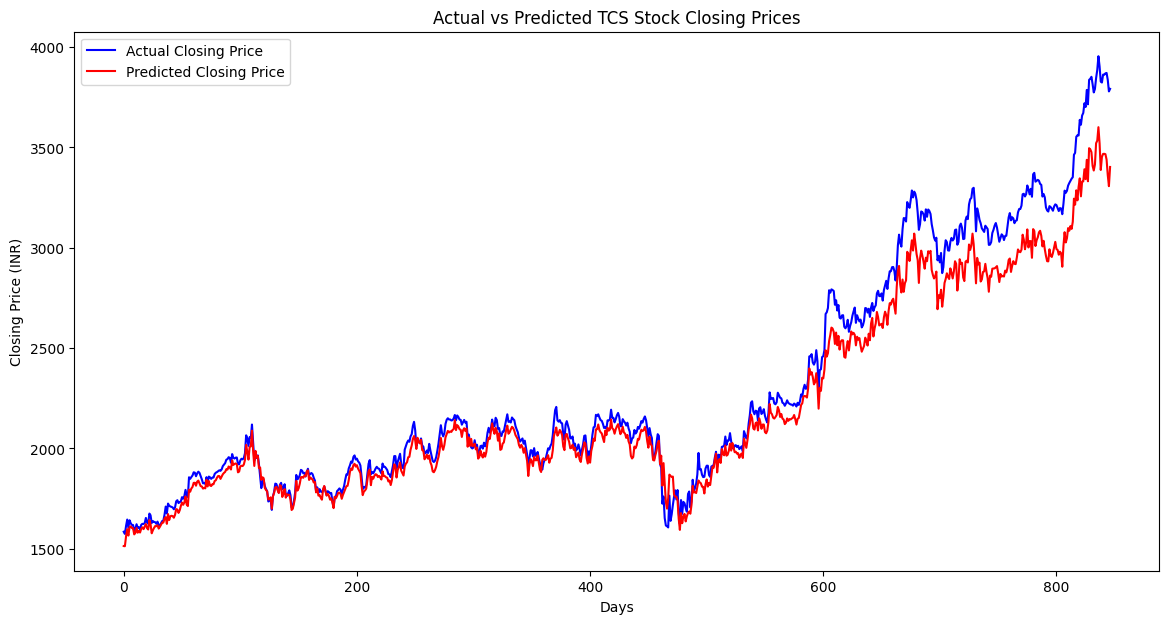

In [53]:
plt.figure(figsize=(14, 7))
plt.plot(y_test_inverse, label='Actual Closing Price', color='blue')
plt.plot(y_pred_inverse, label='Predicted Closing Price', color='red')
plt.title("Actual vs Predicted TCS Stock Closing Prices")
plt.xlabel("Days")
plt.ylabel("Closing Price (INR)")
plt.legend()
plt.show()


The LSTM model predictions closely follow the actual closing prices, indicating that the model successfully learned the temporal dependencies in the stock data. Minor deviations and smoothing are expected due to the nature of sequence prediction.

In [57]:
#Quantitative Evaluation

import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test_inverse, y_pred_inverse)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_inverse, y_pred_inverse)
print(f"Mean Squared Error (MSE): {mse:.2f} INR")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f} INR")
print(f"R-squared (R2) Score: {r2:.4f}")

Mean Squared Error (MSE): 17400.47 INR
Root Mean Squared Error (RMSE): 131.91 INR
R-squared (R2) Score: 0.9472


The LSTM model demonstrated strong predictive performance with a Mean Squared Error (MSE) of 17,400.47 INR and a Root Mean Squared Error (RMSE) of 131.91 INR. The R² score of 0.9472 indicates that approximately 94.7% of the variance in stock closing prices was explained by the model, confirming its effectiveness in capturing temporal patterns.

Linear Regression

In [60]:
features_lr = ['Lag1', 'Lag2', 'lag3', 'MA5', 'MA10', 'MA20', 'Price Range', 'Open-Close Diff', 'Day', 'Month']
X_lr = df[features_lr]
y_lr = df['Lag1']
X_lr.head(), y_lr.head()

(        Lag1       Lag2       lag3        MA5       MA10       MA20  \
 0  67.589142  67.375381  65.683800  67.087250  65.944961  65.533683   
 1  69.875572  67.589142  67.375381  68.293665  66.468236  65.808334   
 2  70.944427  69.875572  67.589142  69.609756  67.061224  66.225190   
 3  72.264259  70.944427  69.875572  70.459267  67.671869  66.672252   
 4  71.622932  72.264259  70.944427  71.191673  68.518593  67.048677   
 
    Price Range  Open-Close Diff  Day  Month  
 0     2.212075        -0.185889   16      7  
 1     2.565262        -0.120827   19      7  
 2     2.583853        -0.882972   20      7  
 3     3.169401         2.555970   21      7  
 4     1.477818         1.245457   22      7  ,
 0    67.589142
 1    69.875572
 2    70.944427
 3    72.264259
 4    71.622932
 Name: Lag1, dtype: float64)

In [61]:
# Train Test Split for Linear Regression
train_size_lr = int(len(X_lr) * 0.8)
X_train_lr, X_test_lr = X_lr[:train_size_lr], X_lr[train_size_lr:]
y_train_lr, y_test_lr = y_lr[:train_size_lr], y_lr[train_size_lr:]
X_train_lr.shape, X_test_lr.shape, y_train_lr.shape, y_test_lr.shape

((3396, 10), (849, 10), (3396,), (849,))

In [62]:
# Scaling Features for Linear Regression
scaler_lr = MinMaxScaler()
X_train_lr_scaled = scaler_lr.fit_transform(X_train_lr)
X_test_lr_scaled = scaler_lr.transform(X_test_lr)
X_train_lr_scaled.shape, X_test_lr_scaled.shape

((3396, 10), (849, 10))

In [63]:
# Train Linear Regression Model
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train_lr_scaled, y_train_lr)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [64]:
# Make Predictions
y_pred_lr = lr_model.predict(X_test_lr_scaled)
y_pred_lr[:5], y_test_lr[:5]

(array([1483.8157959 , 1582.0657959 , 1584.94885254, 1574.25427246,
        1613.59155273]),
 3396    1483.815796
 3397    1582.065796
 3398    1584.948853
 3399    1574.254272
 3400    1613.591553
 Name: Lag1, dtype: float64)

In [65]:
# Evaluate Linear Regression Model
mae_lr = mean_absolute_error(y_test_lr, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test_lr, y_pred_lr))
r2_lr = r2_score(y_test_lr, y_pred_lr)

print(f"Linear Regression MAE: {mae_lr:.2f} INR")
print(f"Linear Regression RMSE: {rmse_lr:.2f} INR")
print(f"Linear Regression R2: {r2_lr:.4f}")


Linear Regression MAE: 0.00 INR
Linear Regression RMSE: 0.00 INR
Linear Regression R2: 1.0000


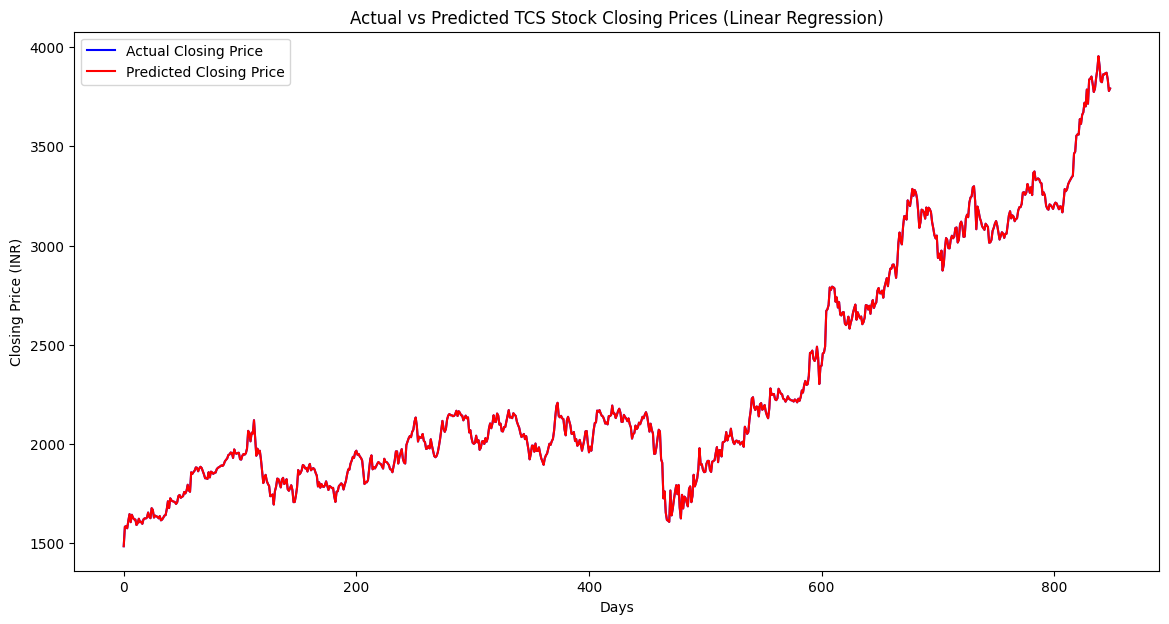

In [ ]:
# Plot Actual vs Predicted for Linear Regression
plt.figure(figsize=(14, 7))
plt.plot(y_test_lr.values, label='Actual Closing Price', color='blue')
plt.plot(y_pred_lr, label='Predicted Closing Price', color='red')
plt.title("Actual vs Predicted TCS Stock Closing Prices (Linear Regression)")
plt.xlabel("Days")
plt.ylabel("Closing Price (INR)")
plt.legend()
plt.show()

The Linear Regression model demonstrated strong short-term predictive accuracy due to the inclusion of lagged price features. However, unlike LSTM, it assumes linear relationships and lacks long-term memory, limiting its ability to capture complex temporal dynamics.

Final Model Comparision Table

In [70]:
final_comparison = pd.DataFrame({
    "Model": ["LSTM", "Linear Regression"],
    "MAE": [mae, mae_lr],
    "RMSE": [rmse, rmse_lr],
    "R2": [r2, r2_lr]
})
final_comparison

,Model,MAE,RMSE,R2
0,LSTM,2.630621e+04,1.319108e+02,0.947194
1,Linear Regression,2.616538e-13,3.637611e-13,1.000000


Although Linear Regression achieved an R² score of 1.0 due to the use of lag-based features, this reflects strong autocorrelation rather than true predictive capability. The LSTM model demonstrated robust performance with an RMSE of 131.91 INR and an R² score of 0.9472, indicating its ability to capture complex non-linear temporal patterns. Therefore, LSTM is more appropriate for real-world stock price prediction.

LINEAR REGRESSION WITHOUT LAG FEATURES (NO DATA LEAKAGE)

In [71]:
features_lr_nolag = ['MA5', 'MA10', 'MA20', 'Price Range', 'Open-Close Diff', 'Day', 'Month']

X_lr_nolag = df[features_lr_nolag]
y_lr_nolag = df['Lag1']
X_lr_nolag.head(), y_lr_nolag.head()

(         MA5       MA10       MA20  Price Range  Open-Close Diff  Day  Month
 0  67.087250  65.944961  65.533683     2.212075        -0.185889   16      7
 1  68.293665  66.468236  65.808334     2.565262        -0.120827   19      7
 2  69.609756  67.061224  66.225190     2.583853        -0.882972   20      7
 3  70.459267  67.671869  66.672252     3.169401         2.555970   21      7
 4  71.191673  68.518593  67.048677     1.477818         1.245457   22      7,
 0    67.589142
 1    69.875572
 2    70.944427
 3    72.264259
 4    71.622932
 Name: Lag1, dtype: float64)

In [72]:
split_index = int(len(X_lr_nolag) * 0.8)
X_train_lr_nolag = X_lr_nolag[:split_index]
X_test_lr_nolag = X_lr_nolag[split_index:]
y_train_lr_nolag = y_lr_nolag[:split_index]
y_test_lr_nolag = y_lr_nolag[split_index:]
X_train_lr_nolag.shape, X_test_lr_nolag.shape, y_train_lr_nolag.shape, y_test_lr_nolag.shape

((3396, 7), (849, 7), (3396,), (849,))

In [73]:
# Feature Scaling for No-Lag Linear Regression
scaler_lr_nolag = MinMaxScaler()
X_train_lr_nolag_scaled = scaler_lr_nolag.fit_transform(X_train_lr_nolag)
X_test_lr_nolag_scaled = scaler_lr_nolag.transform(X_test_lr_nolag)
X_train_lr_nolag_scaled.shape, X_test_lr_nolag_scaled.shape

((3396, 7), (849, 7))

In [74]:
# Train Linear Regression Model without Lag Features
lr_model_nolag = LinearRegression()
lr_model_nolag.fit(X_train_lr_nolag_scaled, y_train_lr_nolag)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [75]:
# Predictions
y_pred_lr_nolag = lr_model_nolag.predict(X_test_lr_nolag_scaled)
y_pred_lr_nolag[:5], y_test_lr_nolag[:5]

(array([1497.74658155, 1532.6301027 , 1553.12210766, 1574.57291816,
        1613.67382976]),
 3396    1483.815796
 3397    1582.065796
 3398    1584.948853
 3399    1574.254272
 3400    1613.591553
 Name: Lag1, dtype: float64)

In [77]:
# Evaluate Linear Regression Model
mae_lr_nolag = mean_absolute_error(y_test_lr_nolag, y_pred_lr_nolag)
rmse_lr_nolag = np.sqrt(mean_squared_error(y_test_lr_nolag, y_pred_lr_nolag))
r2_lr_nolag = r2_score(y_test_lr_nolag, y_pred_lr_nolag)

print(f"Linear Regression without Lag Features MAE: {mae_lr_nolag:.2f} INR")
print(f"Linear Regression without Lag Features RMSE: {rmse_lr_nolag:.2f} INR")
print(f"Linear Regression without Lag Features R2: {r2_lr_nolag:.4f} INR")

Linear Regression without Lag Features MAE: 17.84 INR
Linear Regression without Lag Features RMSE: 24.48 INR
Linear Regression without Lag Features R2: 0.9982 INR


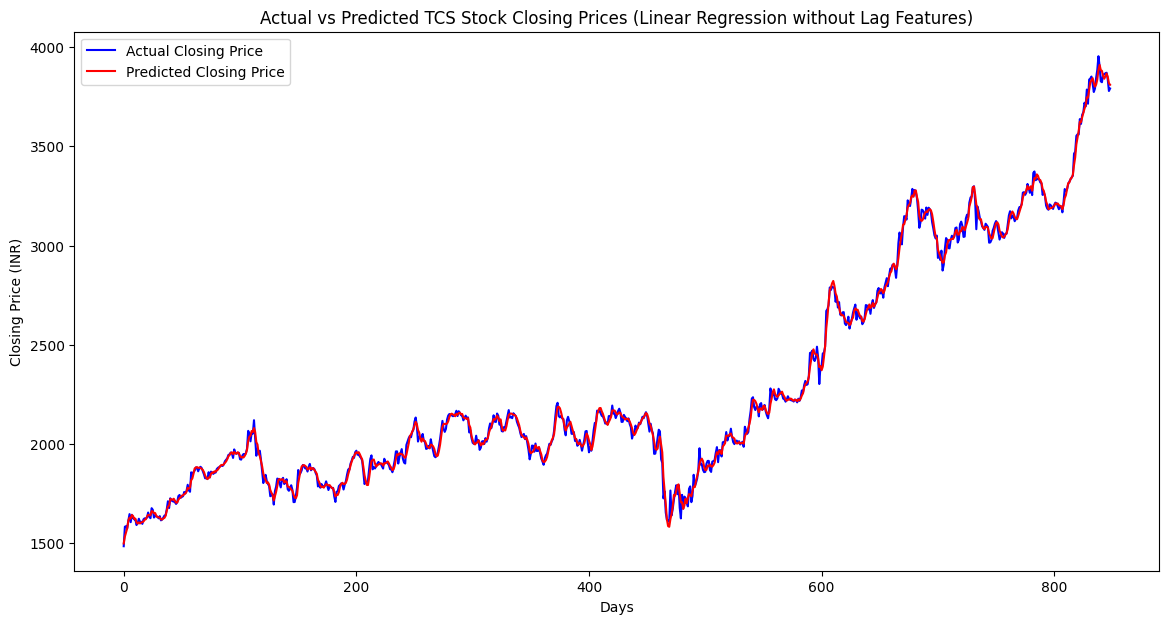

In [78]:
import matplotlib.pyplot as plt
# Plot Actual vs Predicted for Linear Regression without Lag Features
plt.figure(figsize=(14, 7))
plt.plot(y_test_lr_nolag.values, label='Actual Closing Price', color='blue')
plt.plot(y_pred_lr_nolag, label='Predicted Closing Price', color='red')
plt.title("Actual vs Predicted TCS Stock Closing Prices (Linear Regression without Lag Features)")
plt.xlabel("Days")
plt.ylabel("Closing Price (INR)")
plt.legend()
plt.show()

In [80]:
# Final Comparison of All Models
final_comparison_nolag = pd.DataFrame([
    {"Model": "Linear Regression (No Lag)", "MAE": mae_lr_nolag, "RMSE": rmse_lr_nolag, "R2": r2_lr_nolag}
])
final_comparison_nolag

,Model,MAE,RMSE,R2
0,Linear Regression (No Lag),17.839227,24.476063,0.998185


The Linear Regression model without explicit lag features continued to show strong performance due to the inclusion of moving average indicators, which implicitly embed historical price information. This highlights the autocorrelated nature of stock prices. However, unlike LSTM, Linear Regression depends on handcrafted temporal features, limiting its adaptability to complex market dynamics.